In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib

In [128]:
i = 0
act = np.load(f'tsne_vis/act_{i}.npy')
preds = np.load('tsne_vis/preds.npy')
labels = np.load('tsne_vis/labels.npy')

In [41]:
color_map = {
  0 : [0, 0, 0],
  1 : [0, 0, 255],
  10: [245, 150, 100],
  11: [245, 230, 100],
  13: [250, 80, 100],
  15: [150, 60, 30],
  16: [255, 0, 0],
  18: [180, 30, 80],
  20: [255, 0, 0],
  30: [30, 30, 255],
  31: [200, 40, 255],
  32: [90, 30, 150],
  40: [255, 0, 255],
  44: [255, 150, 255],
  48: [75, 0, 75],
  49: [75, 0, 175],
  50: [0, 200, 255],
  51: [50, 120, 255],
  52: [0, 150, 255],
  60: [170, 255, 150],
  70: [0, 175, 0],
  71: [0, 60, 135],
  72: [80, 240, 150],
  80: [150, 240, 255],
  81: [0, 0, 255],
  99: [255, 255, 50],
  252: [245, 150, 100],
  256: [255, 0, 0],
  253: [200, 40, 255],
  254: [30, 30, 255],
  255: [90, 30, 150],
  257: [250, 80, 100],
  258: [180, 30, 80],
  259: [255, 0, 0]}
    
    
learning_map_inv = {
  0: 0,      # "unlabeled", and others ignored
  1: 10,     # "car"
  2: 11,    # "bicycle"
  3: 15,     # "motorcycle"
  4: 18,     # "truck"
  5: 20,     # "other-vehicle"
  6: 30,     # "person"
  7: 31,     # "bicyclist"
  8: 32,     # "motorcyclist"
  9: 40,     # "road"
  10: 44,    # "parking"
  11: 48,    # "sidewalk"
  12: 49,    # "other-ground"
  13: 50,    # "building"
  14: 51,    # "fence"
  15: 70,    # "vegetation"
  16: 71,    # "trunk"
  17: 72,    # "terrain"
  18: 80,    # "pole"
  19: 81,    # "traffic-sign"
}

learning_map = {
  0 : 0,    # "unlabeled"
  1 : 0,   # "outlier" mapped to "unlabeled" --------------------------mapped
  10: 1,    # "car"
  11: 2,    # "bicycle"
  13: 5,    # "bus" mapped to "other-vehicle" --------------------------mapped
  15: 3,    # "motorcycle"
  16: 5,    # "on-rails" mapped to "other-vehicle" ---------------------mapped
  18: 4,    # "truck"
  20: 5,    # "other-vehicle"
  30: 6,    # "person"
  31: 7,    # "bicyclist"
  32: 8,    # "motorcyclist"
  40: 9, # "road"
  44: 10,  # "parking"
  48: 11,   # "sidewalk"
  49: 12,   # "other-ground"
  50: 13,   # "building"
  51: 14,   # "fence"
  52: 0,    # "other-structure" mapped to "unlabeled" ------------------mapped
  60: 9,   # "lane-marking" to "road" ---------------------------------mapped
  70: 15,   # "vegetation"
  71: 16,  # "trunk"
  72: 17,    # "terrain"
  80: 18,    # "pole"
  81: 19,    # "traffic-sign"
  99: 0,    # "other-object" to "unlabeled" ----------------------------mapped
  252: 1,    # "moving-car" to "car" ------------------------------------mapped
  253: 7,    # "moving-bicyclist" to "bicyclist" ------------------------mapped
  254: 6,    # "moving-person" to "person" ------------------------------mapped
  255: 8,    # "moving-motorcyclist" to "motorcyclist" ------------------mapped
  256: 5,    # "moving-on-rails" mapped to "other-vehicle" --------------mapped
  257: 5,    # "moving-bus" mapped to "other-vehicle" -------------------mapped
  258: 4,    # "moving-truck" to "truck" --------------------------------mapped
  259: 5,    # "moving-other"-vehicle to "other-vehicle" ----------------mapped
}

label_to_name = {
  0: "car",
  1: "bicycle",
  2: "motorcycle",
  3: "truck",
  4: "other-vehicle",
  5: "person",
  6: "bicyclist",
  7: "motorcyclist",
  8: "road",
  9: "parking",
  10: "sidewalk",
  11: "other-ground",
  12: "building",
  13: "fence",
  14: "vegetation",
  15: "trunk",
  16: "terrain",
  17: "pole",
  18: "traffic-sign"
}

In [88]:
# color_map[learning_map_inv.keys()]
# learning_map_inv.keys()
# learning_map_inv
idx_to_color = {}
for lm in learning_map:
    key = learning_map[lm]
    value = color_map[lm]
    if not key in idx_to_color:
        idx_to_color[key] = np.array(value)/255
    else:
        continue
#     print(key, value)
    
name_to_color = {}

for idx in idx_to_color:
    if idx == 19:
        continue
    color = idx_to_color[idx]
    name = label_to_name[idx]
#     print(name, color)
    name_to_color[name] = color
    
    
labels = np.array(list(name_to_color.keys()))
len_lab = len(labels)

In [6]:
# name_to_color_v2 = {
#   "car": '#fc0106ff',
#   "bicycle": ,
#   "motorcycle",
#   "truck",
#   "other-vehicle",
#   "person",
#   "bicyclist",
#   "motorcyclist",
#   "road",
#   "parking",
#   "sidewalk",
#   "other-ground",
#   "building",
#   "fence",
#   "vegetation",
#   "trunk",
#   "terrain",
#   "pole",
#   "traffic-sign"
# }
    
idx_to_color = {
    0: '#fc0106ff',
    1: '#00dfffff',
    2: '#55aa7fff',
    3: '#aa007fff',
    4: '#aa00ffff',
    5: '#eeb989ff',
    6: '#00ff7fff',
    7: '#134f5cff',
    8: '#ffffffff',
    9: '#555500ff',
    10: '#85200cff',
    11: '#e7dadaff',
    12: '#0b1bacff',
    13: '#ff007fff',
    14: '#329600ff',
    15: '#f97ff7ff',
    16: '#ffaa00ff',
    17: '#ecf712ff',
    18: '#aaff00ff'
}

In [23]:
i = 10
pca_act = np.load(f'tsne_vis/pca_act_{i}.npy')
tsne_act = np.load(f'tsne_vis/tsne_act_{i}.npy')
preds = np.load('tsne_vis/preds.npy')
labels = np.load('tsne_vis/labels.npy')

In [24]:
color_hex = []
for pred in preds:
    color_hex.append(idx_to_color[pred])

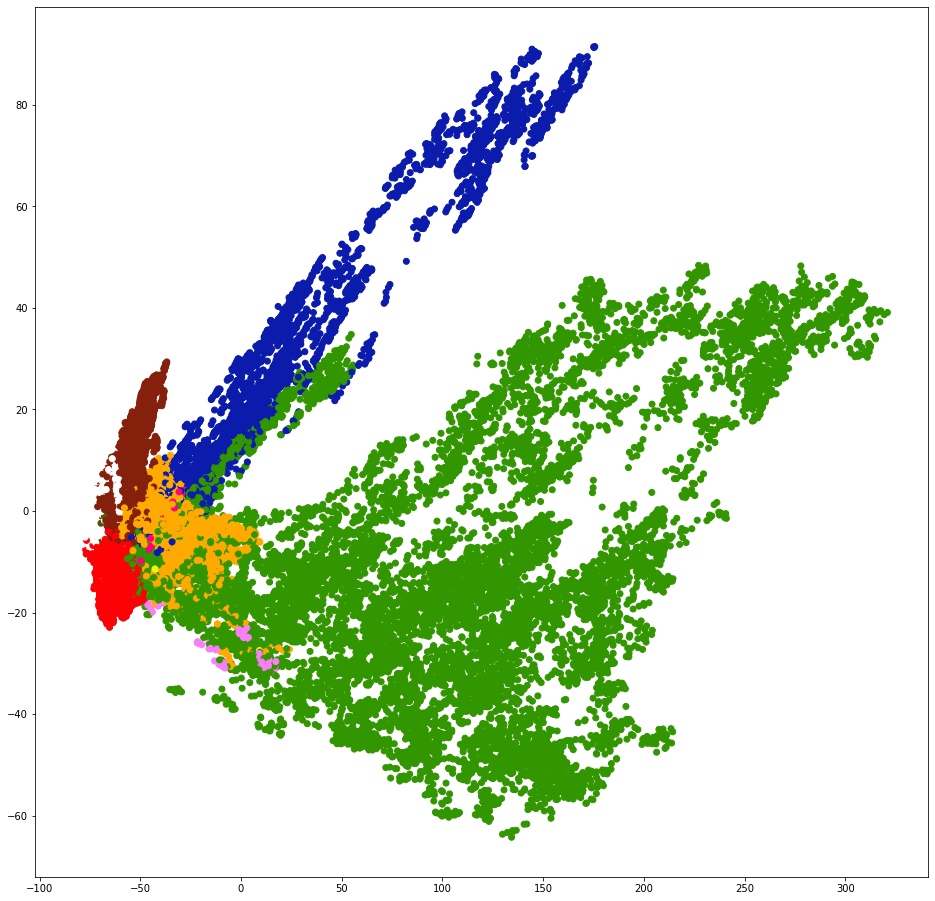

In [25]:
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111)
ax.scatter(pca_act[:, 0], pca_act[:, 1], c=color_hex)

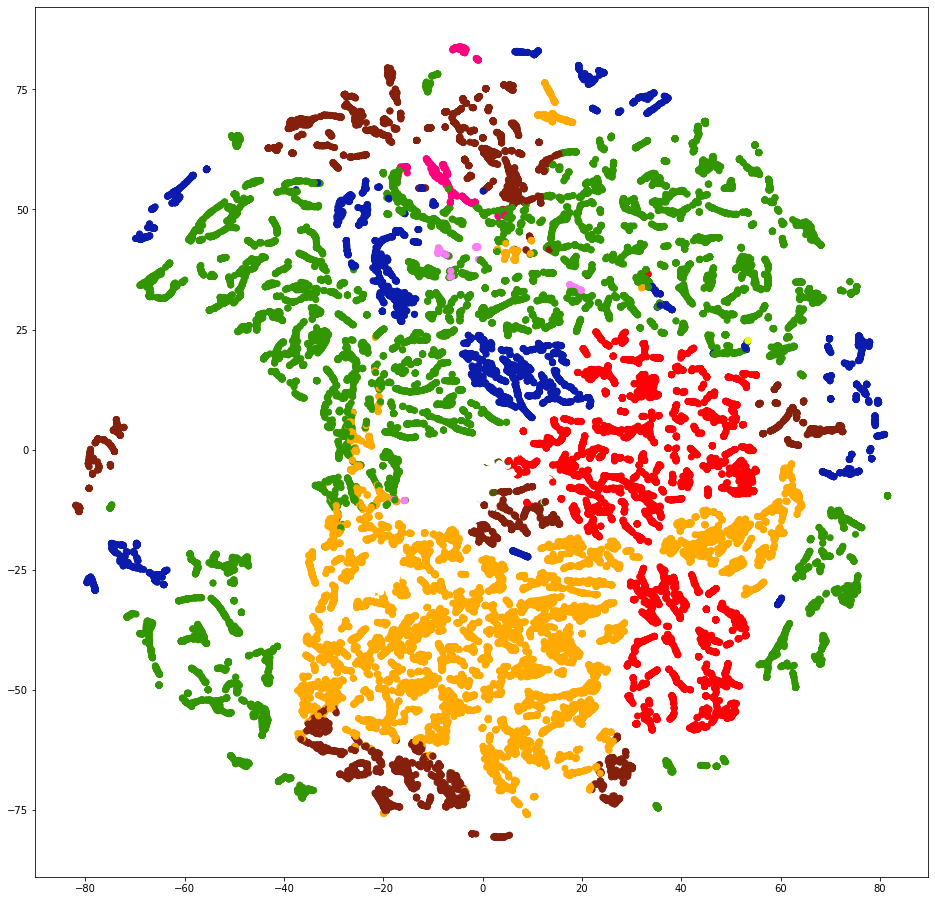

In [26]:
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111)
ax.scatter(tsne_act[:, 0], tsne_act[:, 1], c=color_hex)

In [2]:
import matplotlib.pyplot as plt

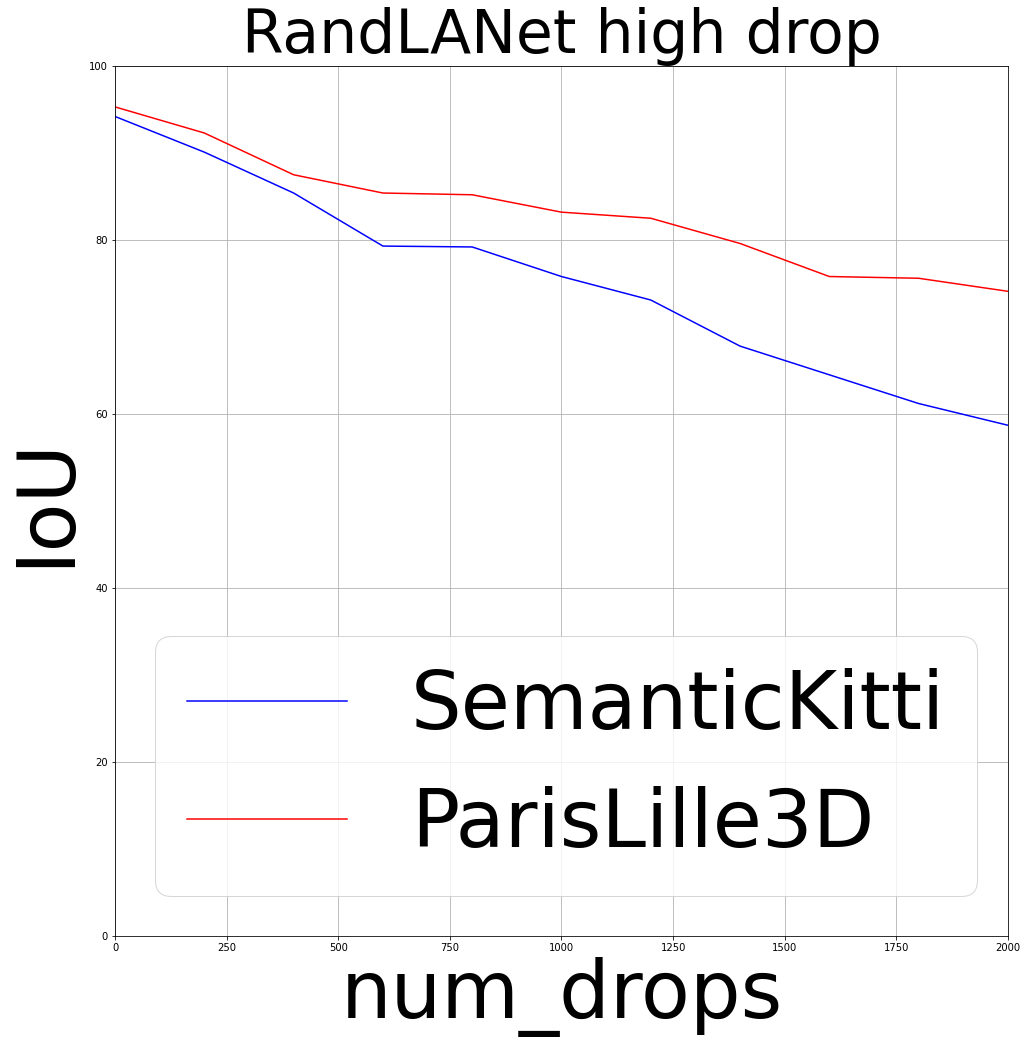

In [3]:
IoU_randlanet_semantickitti_high = [94.2, 90.1, 85.4, 79.3, 79.2, 75.8, 73.1, 67.8, 64.5, 61.2, 58.7]
num_drops = [0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

IoU_kpconv_semantickitti_high = [96.0, 93.4, 87.6, 82.3, 78.9, 76.1, 77.6, 72.1, 68.9, 66.5, 62.3]
IoU_randlanet_parislille_high = [95.3, 92.3, 87.5, 85.4, 85.2, 83.2, 82.5, 79.6, 75.8, 75.6, 74.1]
IoU_kpconv_parislille_high = [94.4, 93.6, 91.4, 90.7, 87.3, 84.7, 82.6, 80.8, 80.5, 78.4, 75.8]

IoU_randlanet_semantickitti_low = [94.2, 94.1, 93.8, 92.5, 92.8, 91.8, 90.4, 91.2, 87.8, 85.3, 86.4]
IoU_kpconv_semantickitti_low = [96.0, 95.2, 95.6, 93.4, 92.7, 91.9, 90.5, 90.1, 89.8, 88.6, 87.5]
IoU_randlanet_parislille_low = [95.3, 94.7, 94.2, 93.4, 92.1, 91.8, 92.7, 90.1, 88.5, 87.2, 87.5]
IoU_kpconv_parislille_low = [94.4, 93.2, 91.2, 90.3, 89.7, 90.5, 89.1, 88.5, 87.3, 86.9, 86.1]



fig = plt.figure(figsize=(16, 16))
# plt.plot(IoU, num_drops)
ax = fig.add_subplot(111)
ax.plot(num_drops, IoU_randlanet_semantickitti_high, color='blue')
ax.plot(num_drops, IoU_randlanet_parislille_high, color='red')
ax.set_xlabel('num_drops', fontsize=80)
ax.set_ylabel('IoU', fontsize=80)
ax.set_xlim(0, 2000)
ax.set_ylim(0, 100)
ax.set_title('RandLANet high drop', fontsize=60)
ax.legend(['SemanticKitti', 'ParisLille3D'], fontsize=80)
plt.grid()
# ax.show_axis()

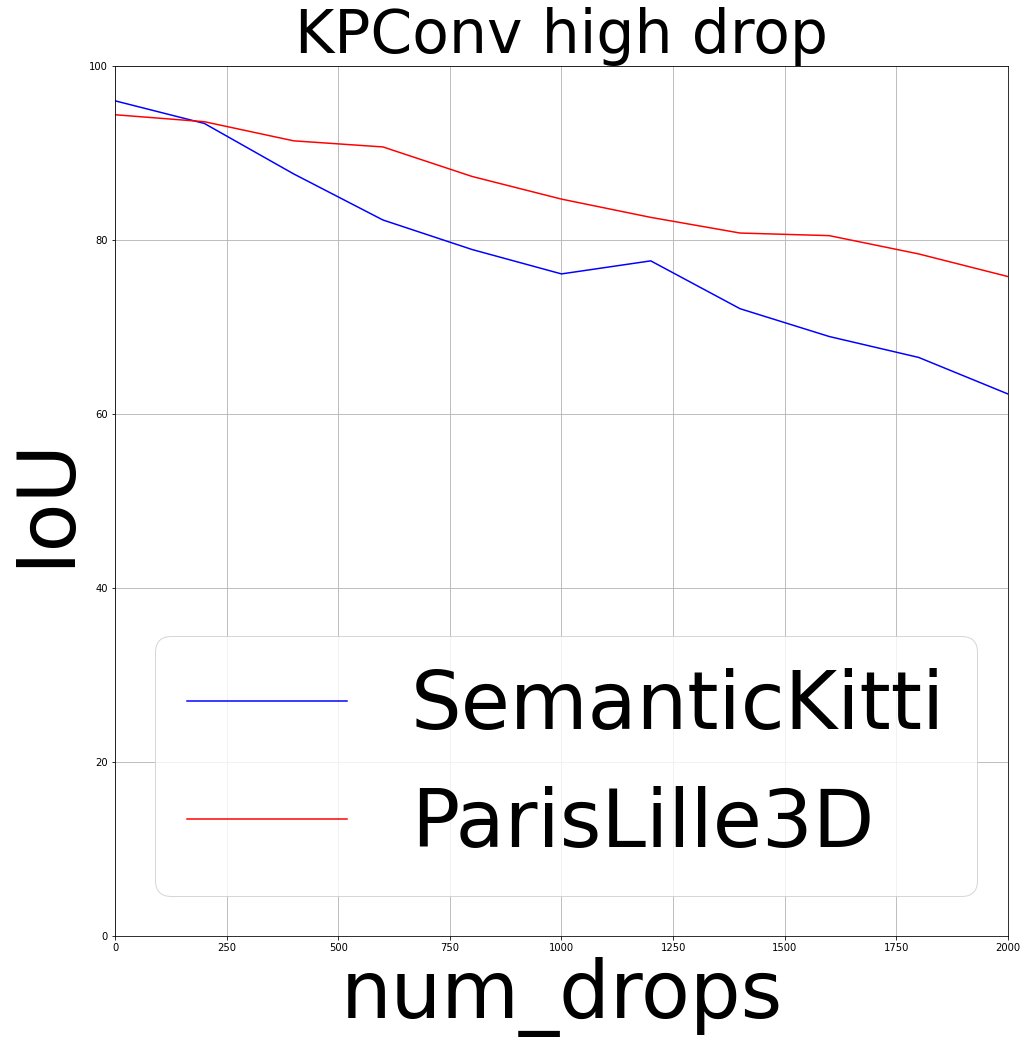

In [4]:
fig = plt.figure(figsize=(16, 16))
# plt.plot(IoU, num_drops)
ax = fig.add_subplot(111)
ax.plot(num_drops, IoU_kpconv_semantickitti_high, color='blue')
ax.plot(num_drops, IoU_kpconv_parislille_high, color='red')
ax.set_xlabel('num_drops', fontsize=80)
ax.set_ylabel('IoU', fontsize=80)
ax.set_xlim(0, 2000)
ax.set_ylim(0, 100)
ax.set_title('KPConv high drop', fontsize=60)
ax.legend(['SemanticKitti', 'ParisLille3D'], fontsize=80)
plt.grid()

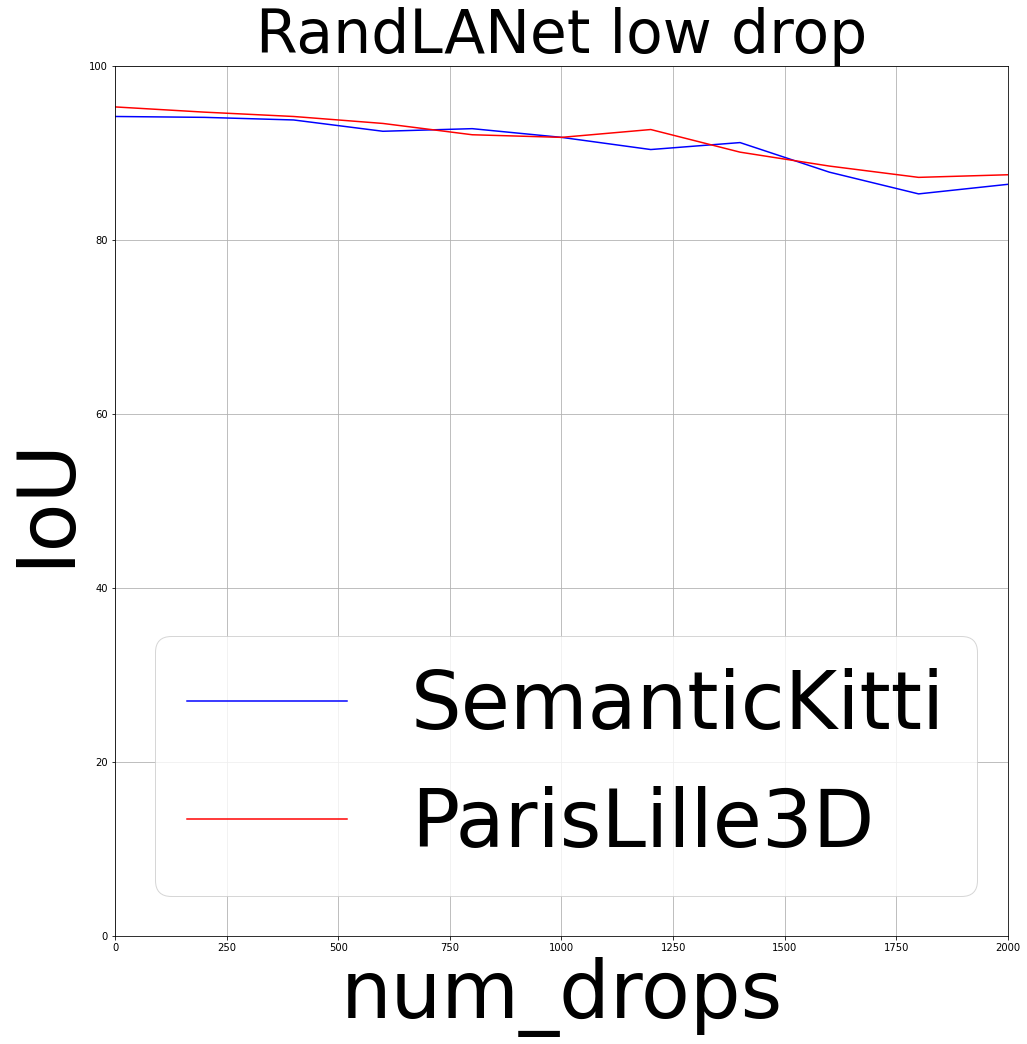

In [5]:
fig = plt.figure(figsize=(16, 16))
# plt.plot(IoU, num_drops)
ax = fig.add_subplot(111)
ax.plot(num_drops, IoU_randlanet_semantickitti_low, color='blue')
ax.plot(num_drops, IoU_randlanet_parislille_low, color='red')
ax.set_xlabel('num_drops', fontsize=80)
ax.set_ylabel('IoU', fontsize=80)
ax.set_xlim(0, 2000)
ax.set_ylim(0, 100)
ax.set_title('RandLANet low drop', fontsize=60)
ax.legend(['SemanticKitti', 'ParisLille3D'], fontsize=80)
plt.grid()

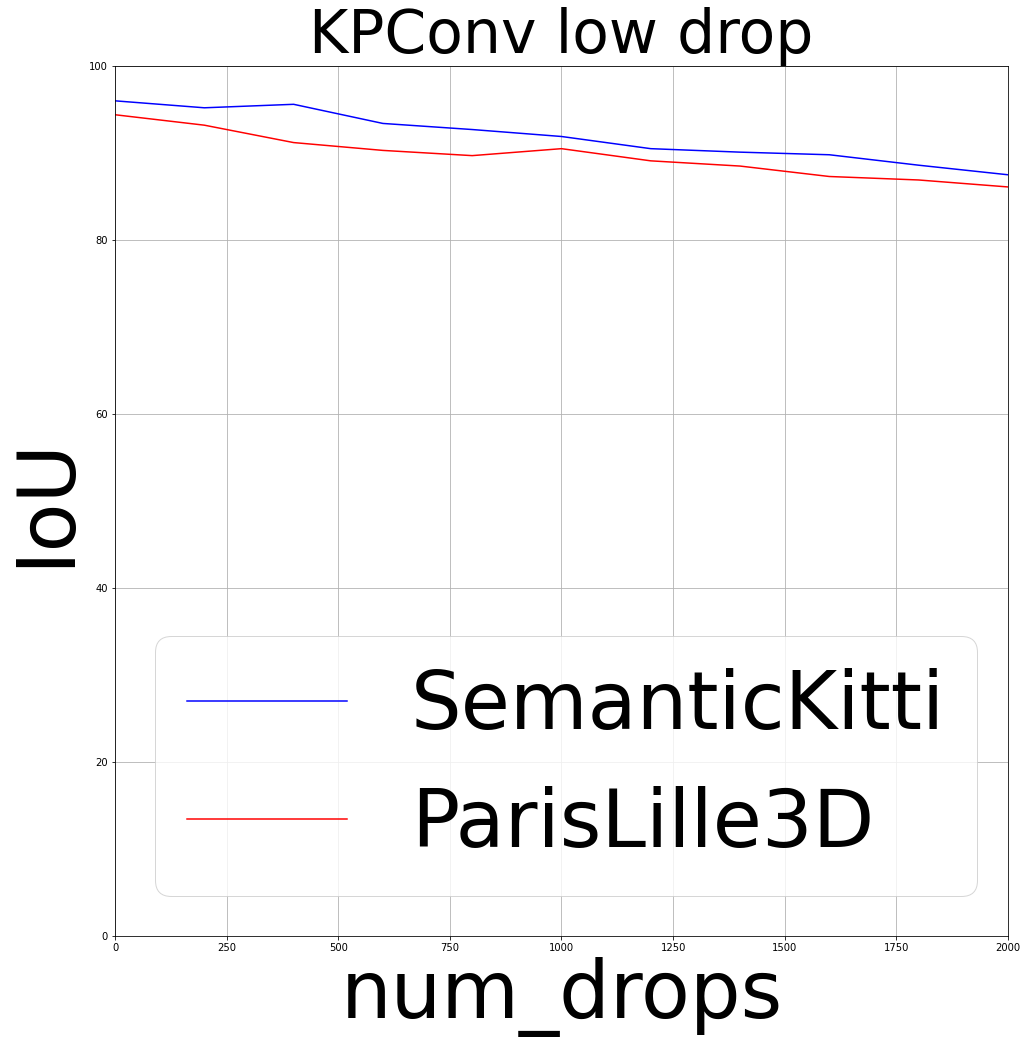

In [6]:
fig = plt.figure(figsize=(16, 16))
# plt.plot(IoU, num_drops)
ax = fig.add_subplot(111)
ax.plot(num_drops, IoU_kpconv_semantickitti_low, color='blue')
ax.plot(num_drops, IoU_kpconv_parislille_low, color='red')
ax.set_xlabel('num_drops', fontsize=80)
ax.set_ylabel('IoU', fontsize=80)
ax.set_xlim(0, 2000)
ax.set_ylim(0, 100)
ax.set_title('KPConv low drop', fontsize=60)
ax.legend(['SemanticKitti', 'ParisLille3D'], fontsize=80)
plt.grid()